In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import hickle
from tqdm import tqdm

In [2]:
# plotting style
import matplotlib as mpl
from matplotlib import rc
mpl.style.use('classic')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size':30})
rc('text', usetex=True)

mpl.rc('xtick', labelsize=25) 
mpl.rc('ytick', labelsize=25)
mpl.rc('xtick', labelsize=25) 
mpl.rc('ytick', labelsize=25)

mpl.rcParams['xtick.major.size'] = 6.0
mpl.rcParams['xtick.major.width'] = 2.5
mpl.rcParams['ytick.major.size'] = 6.0
mpl.rcParams['ytick.major.width'] = 2.5

mpl.rcParams['axes.linewidth'] = 2.0
mpl.rcParams['patch.linewidth'] = 2.0
mpl.rcParams['xtick.major.pad'] = 14.0
mpl.rcParams['ytick.major.pad'] = 14.0

mpl.rcParams['xtick.top'] = False
mpl.rcParams['ytick.right'] = False

mpl.rcParams['xtick.minor.size'] = 4.5
mpl.rcParams['xtick.minor.width'] = 1.25
mpl.rcParams['ytick.minor.size'] = 4.5
mpl.rcParams['ytick.minor.width'] = 1.25

import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

# Load data

In [3]:
true_fractions, _ = hickle.load('data/true_classification_fractions.hkl')
model_fractions = hickle.load('data/ML_classification_preds.hkl')

# Calculate summary statistics

In [4]:
ML_residuals1 = true_fractions[:,0] - model_fractions[:,0]
ML_residuals2 = true_fractions[:,1] - model_fractions[:,1]
ML_residuals3 = true_fractions[:,2] - model_fractions[:,2]

In [5]:
ML_sigma1 = np.std(ML_residuals1)
ML_sigma2 = np.std(ML_residuals2)
ML_sigma3 = np.std(ML_residuals3)
ML_sigma1, ML_sigma2, ML_sigma3

(0.11208189988392567, 0.09040573430747277, 0.08943156812903313)

In [6]:
ML_bias1 = np.mean(ML_residuals1)
ML_bias2 = np.mean(ML_residuals2)
ML_bias3 = np.mean(ML_residuals3)
ML_bias1, ML_bias2, ML_bias3

(0.0027496866595164604, -0.0010782975735426491, -0.0016713815532340105)

#  Make scatterplot

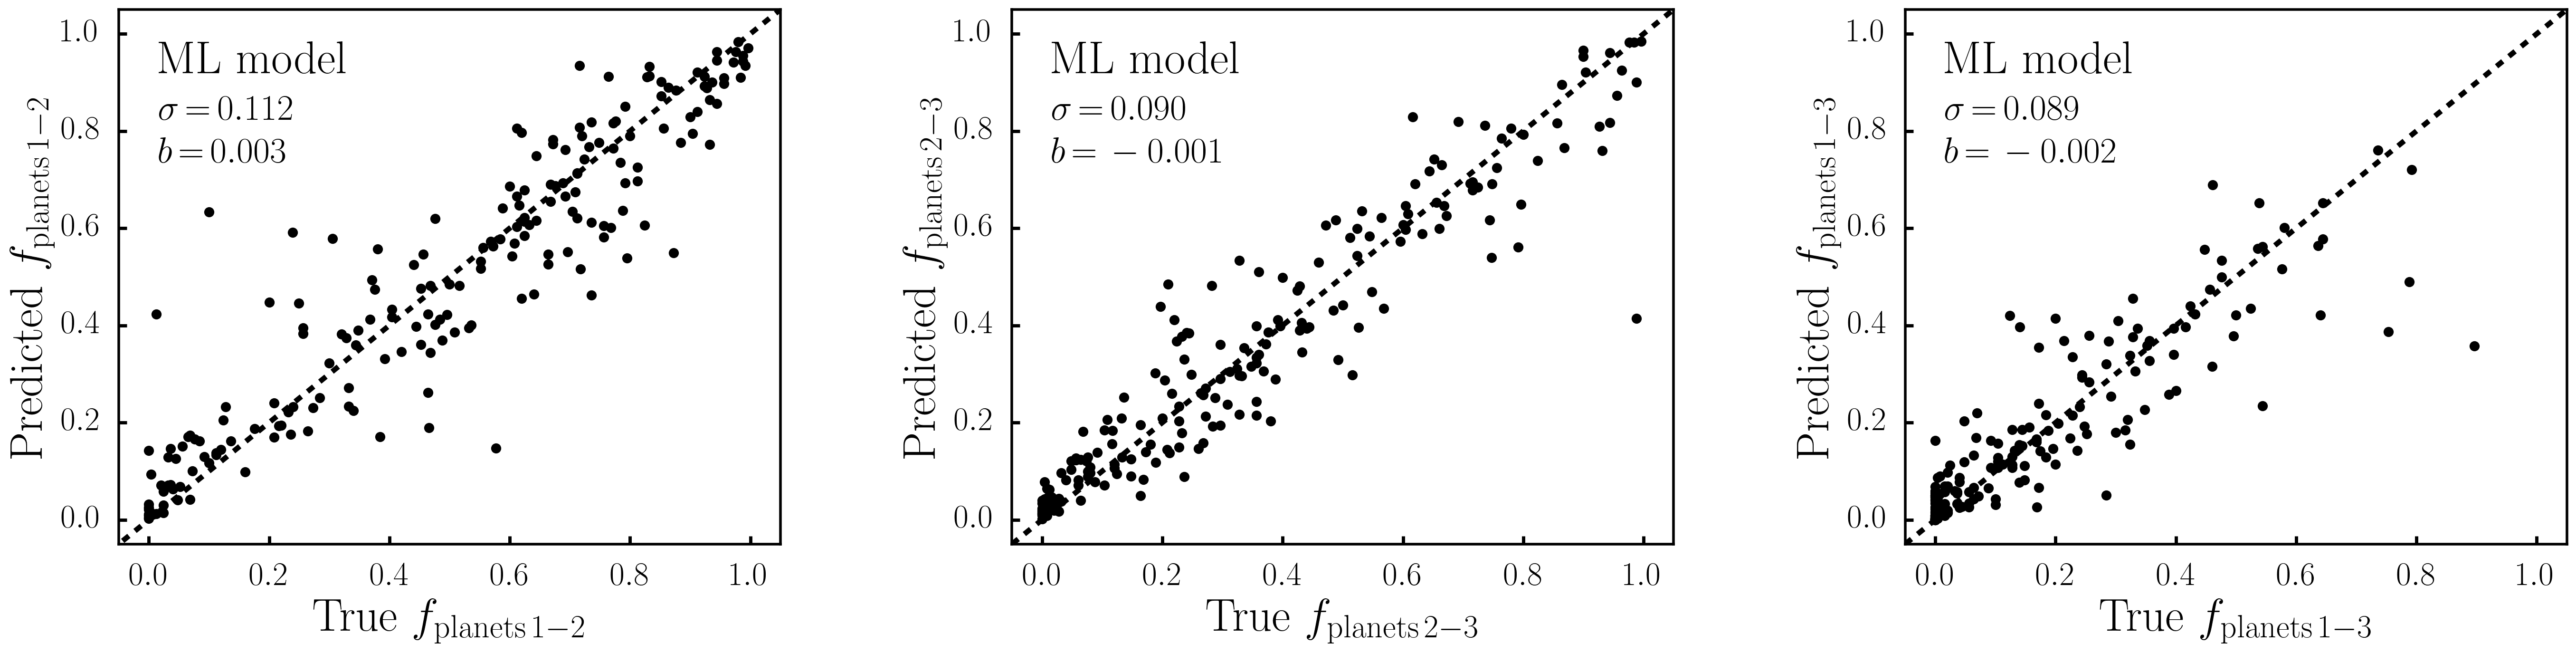

In [7]:
# plot parameters
c = 0.06
c2 = 0.1
c3 = 0.08

# setup axes
fig, ax = plt.subplots(1, 3, figsize=(33.25,7.03), facecolor='white', dpi=200)

ax[0].scatter(true_fractions[:,0], model_fractions[:,0], color='k', s=32, alpha=1.0, label=r'Collision classifier')
ax[0].plot(np.linspace(-0.5, 1.5), np.linspace(-0.5, 1.5), c='k', lw=4, ls='--', label=r'$y\,{=}\,x$')
ax[0].set_xlabel(r'True $f_{\mathrm{planets}\,1-2}$', fontsize=35, labelpad=5)
ax[0].set_ylabel(r'Predicted $f_{\mathrm{planets}\,1-2}$', fontsize=35, labelpad=5)
ax[0].set_xlim([-0.05, 1.05])
ax[0].set_ylim([-0.05, 1.05])

ax[0].text(-0.05+c*1.10, 1.05-c*1.10, r'ML model', color = 'k', fontsize=35, horizontalalignment='left', verticalalignment='top')
ax[0].text(-0.05+c*1.10, 1.05-(c+c2)*1.10, r'$\sigma\,{=}\,0.112$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')
ax[0].text(-0.05+c*1.10, 1.05-(c+c2+c3)*1.10, r'$b\,{=}\,0.003$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')

ax[1].scatter(true_fractions[:,1], model_fractions[:,1], color='k', s=32, alpha=1.0)
ax[1].plot(np.linspace(-0.5, 1.5), np.linspace(-0.5, 1.5), c='k', lw=4, ls='--', label=r'$y\,{=}\,x$')
ax[1].set_xlabel(r'True $f_{\mathrm{planets}\,2-3}$', fontsize=35, labelpad=5)
ax[1].set_ylabel(r'Predicted $f_{\mathrm{planets}\,2-3}$', fontsize=35, labelpad=5)
ax[1].set_xlim([-0.05, 1.05])
ax[1].set_ylim([-0.05, 1.05])

ax[1].text(-0.05+c*1.10, 1.05-c*1.10, r'ML model', color = 'k', fontsize=35, horizontalalignment='left', verticalalignment='top')
ax[1].text(-0.05+c*1.10, 1.05-(c+c2)*1.10, r'$\sigma\,{=}\,0.090$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')
ax[1].text(-0.05+c*1.10, 1.05-(c+c2+c3)*1.10, r'$b\,{=}\,-0.001$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')

ax[2].scatter(true_fractions[:,2], model_fractions[:,2], color='k', s=32, alpha=1.0)
ax[2].plot(np.linspace(-0.5, 1.5), np.linspace(-0.5, 1.5), c='k', lw=4, ls='--', label=r'$y\,{=}\,x$')
ax[2].set_xlabel(r'True $f_{\mathrm{planets}\,1-3}$', fontsize=35, labelpad=5)
ax[2].set_ylabel(r'Predicted $f_{\mathrm{planets}\,1-3}$', fontsize=35, labelpad=5)
ax[2].set_xlim([-0.05, 1.05])
ax[2].set_ylim([-0.05, 1.05])

ax[2].text(-0.05+c*1.10, 1.05-c*1.10, r'ML model', color = 'k', fontsize=35, horizontalalignment='left', verticalalignment='top')
ax[2].text(-0.05+c*1.10, 1.05-(c+c2)*1.10, r'$\sigma\,{=}\,0.089$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')
ax[2].text(-0.05+c*1.10, 1.05-(c+c2+c3)*1.10, r'$b\,{=}\,-0.002$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')

fig.subplots_adjust(wspace=0.35)
plt.show()